## Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import re

import spacy
from nltk.tokenize import RegexpTokenizer
import nltk

Here we explore the data for only the National summary. We do explore the complete data in another notebook.

In [3]:
national = pd.read_csv('./data/beige_book_national.csv')

In [4]:
national.head()

,Unnamed: 0,national_report,date
0,0,\n\r\n var ref = document.referrer;\r\n ...,2019-04
1,1,\n\r\n var ref = document.referrer;\r\n ...,2019-03
2,2,\n\r\n var ref = document.referrer;\r\n ...,2019-01
3,3,\n\r\n var ref = document.referrer;\r\n ...,2018-12
4,4,\n\r\n var ref = document.referrer;\r\n ...,2018-10


In [5]:
national.drop(columns='Unnamed: 0', inplace=True)

In [6]:
national.shape

(429, 2)

## Data Cleaning

In [7]:
def html_to_words(raw_text):
    # Function to convert a document to a string of words
    
    # 1. Remove HTML.
    document = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", document)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english')) 
    extra = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 
                   'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 
                   'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 
                   'need', 'even', 'right', 'line', 'even', 'also', 'may', 
                   'take', 'come', 'http','https','www','com','@','...','…', 'var', 
                   'ref', 'document', 'referrer', 'var', 'bbpath', 'href', 'archive', 
                   'function', 'beige','book', 'federal', 'reserve', 'summary', 
                   'indexof', 'backtoresults','history', 'go', 'else', 'window', 
                   'location', 'back', 'search','this', 'report', 'prepared', 'federal', 
                   'reserve', 'bank', 'summarizes','january', 'february', 'march', 'april', 
                   'may', 'june', 'july', 'august','september', 'october', 'november', 
                   'december', 'atlanta', 'boston', 'chicago','cleveland', 'dallas', 
                   'kansas', 'minneapolis', 'york', 'philadelphia', 'richmond', 'san', 
                   'francisco', 'st', 'louis', 'officials', 'comments', 
                   'views', 'commentary', 'national', 'based', 'information', 'collected',
                   'received', 'contacts', 'outside', 'system', 'page', 'url', 'link', 
                   'district', 'districts', 'activity']
    # 5. Remove stop words.
    meaningful_words = [word for word in words if not word in stops and word not in extra]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [8]:
# applies the html_to_words function on the minutes column
# and creates a new column with clean text

national['clean_text'] = national['national_report'].apply(html_to_words)
national.head()

,national_report,date,clean_text
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic economic expanded slight mode...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic economic continued expan...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic economic increased u eight tw...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic twelve reported economies exp...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic economic expanded across unit...


In [9]:
#national['clean_text'][0]

## Stemming

In [10]:
# import tokenizer and stemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

In [11]:
# define a function that takes in a text
# and tokenizes and stems each word
def stem_text(text):    
    stm = PorterStemmer()
    tokenized = word_tokenize(text)
    stem_tokes = []
    for toke in tokenized:
        stem_tokes.append(stm.stem(toke))
    stem_tokes

    combined = ''
    for stemmed in stem_tokes:
        combined += stemmed + ' '
    return combined

## Lemmatization

In [12]:
# # define a function that takes in a text
# # and tokenizes and lemmatizes that text
# def lem_text(text):    
#     lem = WordNetLemmatizer()
#     tokenizer = RegexpTokenizer('[A-Z]\w+')
#     tokenized = tokenizer.tokenize(text)
#     lemmed_tokes = []
#     for toke in tokenized:
#         lemmed_tokes.append(lem.lemmatize(toke))
#     lemmed_tokes

#     combined = ''
#     for lemmed in lemmed_tokes:
#         combined += lemmed + ' '
#     return combined

In [13]:
national['stemmed_text'] = national['clean_text'].apply(stem_text)
national.head()

,national_report,date,clean_text,stemmed_text
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic economic expanded slight mode...,overal econom econom expand slight moder pace ...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic economic continued expan...,citi overal econom econom continu expand late ...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic economic increased u eight tw...,overal econom econom increas u eight twelv rep...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic twelve reported economies exp...,overal econom twelv report economi expand mode...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic economic expanded across unit...,overal econom econom expand across unit state ...


## Extracting Nouns from Each Document

In [14]:
nlp = spacy.load('en') 

In [15]:
# generate bi_grams of nouns and non-nouns
def noun_notnoun(phrase):
    doc = nlp(phrase) # create spacy object
    token_not_noun = []
    notnoun_noun_list = []

    for item in doc:
        if item.pos_ != "NOUN": # separate nouns and not nouns
            token_not_noun.append(item.text)
        if item.pos_ == "NOUN":
            noun = item.text

    for notnoun in token_not_noun:
        notnoun_noun_list.append(notnoun + " " + noun)

    return notnoun_noun_list

In [16]:
national['nouns_notnouns'] = national['clean_text'].apply(noun_notnoun)
national.head()

,national_report,date,clean_text,stemmed_text,nouns_notnouns
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic economic expanded slight mode...,overal econom econom expand slight moder pace ...,"[overall lending, economic lending, economic l..."
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic economic continued expan...,citi overal econom econom continu expand late ...,"[overall lending, economic lending, economic l..."
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic economic increased u eight tw...,overal econom econom increas u eight twelv rep...,"[overall lending, economic lending, economic l..."
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic twelve reported economies exp...,overal econom twelv report economi expand mode...,"[overall lending, economic lending, twelve len..."
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic economic expanded across unit...,overal econom econom expand across unit state ...,"[overall lending, economic lending, economic l..."


In [17]:
national['nouns_notnouns'][0]

['overall lending',
 'economic lending',
 'economic lending',
 'expanded lending',
 'slight lending',
 'moderate lending',
 'early lending',
 'reported lending',
 'continued lending',
 'similar lending',
 'previous lending',
 'reported lending',
 'strengthening lending',
 'little lending',
 'among lending',
 'reporting lending',
 'expecting lending',
 'slight lending',
 'modest lending',
 'ahead lending',
 'reports lending',
 'mixed lending',
 'suggested lending',
 'sluggish lending',
 'general lending',
 'reports lending',
 'generally lending',
 'upbeat lending',
 'mixed lending',
 'indicated lending',
 'steady lending',
 'favorable lending',
 'although lending',
 'noted lending',
 'related lending',
 'reported lending',
 'stronger lending',
 'although lending',
 'noted lending',
 'low lending',
 'higher lending',
 'priced lending',
 'among lending',
 'reporting lending',
 'agricultural lending',
 'remained lending',
 'weak lending',
 'expressing lending',
 'impact lending',
 'current

In [18]:
# define a function to extract a text's nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_noun(text):
    document = nlp(text)
    nouns = []
    for token in document:
        if token.pos_ == 'NOUN':
            nouns.append(str(token))   
    #print(NOUNS)
    combined = ''
    for token in nouns:
        combined += token + ' '
    return combined

In [19]:
len(extract_noun(national['national_report'][100]))

4209

In [20]:
len(national['national_report'][100])

13765

In [21]:
# apply to the entire dataframe
national['nouns'] = national['clean_text'].apply(extract_noun)
national.head()

,national_report,date,clean_text,stemmed_text,nouns_notnouns,nouns
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic economic expanded slight mode...,overal econom econom expand slight moder pace ...,"[overall lending, economic lending, economic l...",pace growth pace change outlook growth months ...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic economic continued expan...,citi overal econom econom continu expand late ...,"[overall lending, economic lending, economic l...",city growth conditions half government shutdow...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic economic increased u eight tw...,overal econom econom increas u eight twelv rep...,"[overall lending, economic lending, economic l...",growth nonauto retail sales holiday traffic ye...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic twelve reported economies exp...,overal econom twelv report economi expand mode...,"[overall lending, economic lending, twelve len...",economies pace mid growth period city growth b...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic economic expanded across unit...,overal econom econom expand across unit state ...,"[overall lending, economic lending, economic l...",states majority growth growth growth manufactu...


In [22]:
# define a function to extract a text's proper nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_prpnoun(text):
    document = nlp(text)
    PROPN = []
    for token in document:
        if token.pos_ == 'PROPN':
            PROPN.append(str(token))   
    #print(PROPN)
    combined = ''
    for token in PROPN:
        combined += token + ' '
    return combined

In [23]:
len(extract_prpnoun(national['national_report'][0]))

589

In [24]:
len(national['national_report'][0])

8141

In [25]:
national['proper_nouns'] = national['clean_text'].apply(extract_noun)
national.head()

,national_report,date,clean_text,stemmed_text,nouns_notnouns,nouns,proper_nouns
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,overall economic economic expanded slight mode...,overal econom econom expand slight moder pace ...,"[overall lending, economic lending, economic l...",pace growth pace change outlook growth months ...,pace growth pace change outlook growth months ...
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,city overall economic economic continued expan...,citi overal econom econom continu expand late ...,"[overall lending, economic lending, economic l...",city growth conditions half government shutdow...,city growth conditions half government shutdow...
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,overall economic economic increased u eight tw...,overal econom econom increas u eight twelv rep...,"[overall lending, economic lending, economic l...",growth nonauto retail sales holiday traffic ye...,growth nonauto retail sales holiday traffic ye...
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,overall economic twelve reported economies exp...,overal econom twelv report economi expand mode...,"[overall lending, economic lending, twelve len...",economies pace mid growth period city growth b...,economies pace mid growth period city growth b...
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,overall economic economic expanded across unit...,overal econom econom expand across unit state ...,"[overall lending, economic lending, economic l...",states majority growth growth growth manufactu...,states majority growth growth growth manufactu...


# Colocations

Collocations are expressions of multiple words which commonly co-occur.

In [26]:
# Extracting words from each document

# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenizer Texts
dirty_text_tokens = [tokenizer.tokenize(token.lower().strip()) for token in national['national_report']]

# Initialize master list to populate
master_text_tokens = []

# For each dirty text, get list of clean tokens and append to master_text_tokens
for text in dirty_text_tokens:
    # Create template for clean tokens to populate for this particular text
    clean_text_tokens = []
    # For each word/token in each document, make sure it is not a stopword 
    # or URL piece or main search term 
    for word in text:
        if ((word not in stopwords.words('english')) and (word not in ['from', 'subject', 're', 
                    'edu', 'use', 'not', 'would', 'say', 
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 
                   'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 
                   'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 
                   'need', 'even', 'right', 'line', 'even', 'also', 'may', 
                   'take', 'come', 'http','https','www','com','@','...','…', 'var', 
                   'ref', 'document', 'referrer', 'var', 'bbpath', 'href', 'archive', 
                   'function', 'beige','book', 'federal', 'reserve', 'summary', 
                   'indexof', 'backtoresults','history', 'go', 'else', 'window', 
                   'location', 'back', 'search','this', 'report', 'prepared', 'federal', 
                   'reserve', 'bank', 'summarizes','january', 'february', 'march', 'april', 
                   'may', 'june', 'july', 'august','september', 'october', 'november', 
                   'december', 'atlanta', 'boston', 'chicago','cleveland', 'dallas', 
                   'kansas', 'minneapolis', 'york', 'philadelphia', 'richmond', 'san', 
                   'francisco', 'st', 'louis', 'officials', 'comments', 
                   'views', 'commentary', 'national', 'based', 'information', 'collected',
                   'received', 'contacts', 'outside', 'system', 'page', 'url', 'link', 
                   'district', 'districts', 'activity'])):
            # Now extract it into clean token list
            clean_text_tokens.append(word)
    # Append this list of tokens to the master list
    master_text_tokens.append(clean_text_tokens)

In [27]:
# "de-lists" a list of lists. 
# That is, turns a list of lists into a single list
full_list = master_text_tokens[0]
for sub_list in master_text_tokens[1:]:
    full_list.extend(sub_list)

In [28]:
full_list[0]

'overall'

In [29]:
len(full_list)

297798

In [30]:
from nltk.collocations import *

In [31]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [32]:
finder = BigramCollocationFinder.from_words(full_list)
finder.nbest(bigram_measures.pmi, 20)

[('ac', 'cording'),
 ('adamant', 'opposition'),
 ('addressed', 'advertisements'),
 ('advertisements', 'parents'),
 ('ambitious', 'assumptions'),
 ('ax', 'moats'),
 ('birmingham', 'jacksonville'),
 ('bovine', 'tuberculosis'),
 ('carts', 'snowmobiles'),
 ('century', 'rollover'),
 ('citizens', 'teens'),
 ('clearest', 'impressions'),
 ('club', 'memberships'),
 ('colleges', 'tentatively'),
 ('complexities', 'irs'),
 ('constructive', 'workout'),
 ('court', 'decision'),
 ('crudely', 'clumsily'),
 ('dangerously', 'illiquid'),
 ('dazzle', 'imagination')]

*While these words are highly collocated, the expressions are also very infrequent. Therefore, it is useful to apply filters.*

In [33]:
# ignores all bigrams which occur less than n times in the corpus
finder.apply_freq_filter(5)
finder.nbest(bigram_measures.pmi, 20)

[('mad', 'cow'),
 ('las', 'vegas'),
 ('los', 'angeles'),
 ('regulation', 'q'),
 ('memory', 'chips'),
 ('lawn', 'garden'),
 ('co', 'op'),
 ('fort', 'worth'),
 ('sugar', 'cane'),
 ('cloud', 'computing'),
 ('merger', 'acquisition'),
 ('mergers', 'acquisitions'),
 ('cow', 'disease'),
 ('op', 'condo'),
 ('virtual', 'standstill'),
 ('e', 'commerce'),
 ('broadway', 'theaters'),
 ('herd', 'sizes'),
 ('feedlot', 'operators'),
 ('per', 'cent')]

In [34]:
finder = TrigramCollocationFinder.from_words(full_list)
finder.nbest(trigram_measures.pmi, 20)

[('addressed', 'advertisements', 'parents'),
 ('fleeing', 'escape', 'harsher'),
 ('golf', 'carts', 'snowmobiles'),
 ('ml', 'erupt', 'reigniting'),
 ('motorcycles', 'golf', 'carts'),
 ('northerners', 'fleeing', 'escape'),
 ('stop', 'des', 'hormone'),
 ('urn', 'ax', 'moats'),
 ('vaccinated', 'bovine', 'tuberculosis'),
 ('ambitious', 'assumptions', 'justify'),
 ('assumptions', 'justify', 'transaction'),
 ('attended', 'mardi', 'gras'),
 ('regain', 'resident', 'populations'),
 ('setback', 'pointless', 'nonsense'),
 ('underestimated', 'wrangling', 'chaos'),
 ('video', 'tape', 'recorders'),
 ('vrms', 'gpms', 'vmms'),
 ('austin', 'el', 'paso'),
 ('avocado', 'mango', 'foliage'),
 ('disney', 'experimental', 'prototype')]

*Using trigrams, we find some expressions that are frequently used. For instance, the expression "video tape recorder" and "attended mardi gras" are frequently used together.* 

In [35]:
# ignores all trigrams which occur less than n times in the corpus
finder.apply_freq_filter(5)
finder.nbest(trigram_measures.pmi, 20)

[('mad', 'cow', 'disease'),
 ('co', 'op', 'condo'),
 ('world', 'war', 'ii'),
 ('attendance', 'broadway', 'theaters'),
 ('cash', 'clunkers', 'program'),
 ('affordable', 'care', 'act'),
 ('sport', 'utility', 'vehicles'),
 ('east', 'west', 'coasts'),
 ('state', 'local', 'governments'),
 ('lengthening', 'lead', 'times'),
 ('professional', 'scientific', 'technical'),
 ('sports', 'utility', 'vehicles'),
 ('trucks', 'sport', 'utility'),
 ('small', 'medium', 'sized'),
 ('north', 'dakota', 'montana'),
 ('longer', 'lead', 'times'),
 ('rains', 'brought', 'relief'),
 ('op', 'condo', 'market'),
 ('public', 'works', 'projects'),
 ('exchange', 'value', 'dollar')]

## Visualizing Text

In [36]:
list(nltk.bigrams(full_list))
from nltk import FreqDist

Fdist = FreqDist(list(nltk.bigrams(full_list)))

In [37]:
Fdist.most_common(10)

[(('real', 'estate'), 1376),
 (('loan', 'demand'), 764),
 (('retail', 'sales'), 720),
 (('consumer', 'spending'), 696),
 (('city', 'reported'), 662),
 (('new', 'city'), 519),
 (('commercial', 'real'), 481),
 (('residential', 'construction'), 461),
 (('labor', 'markets'), 450),
 (('new', 'reported'), 429)]

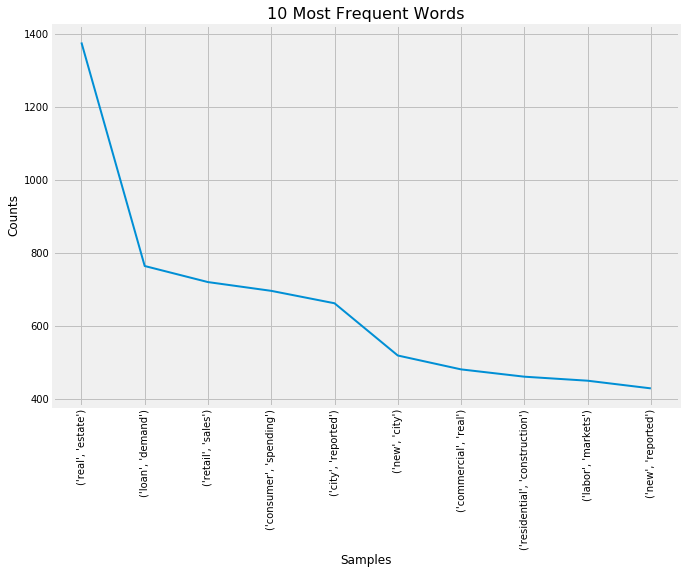

In [45]:
plt.figure(figsize=(10, 7))
plt.title('10 Most Frequent Words', fontsize=16)
Fdist.plot(10)


In [39]:
#x = [i[0].join(",") for i in Fdist.most_common(10)]
y = [i[1] for i in Fdist.most_common(10)]

x = [i[0][0] + " " + i[0][1] for i in Fdist.most_common(10)]

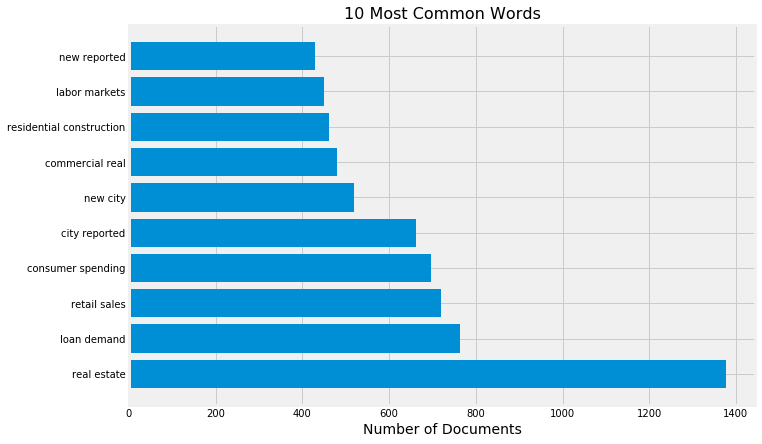

In [44]:
plt.figure(figsize=(10, 7))
plt.barh(x, y)
#plt.xticks(rotation=90)
plt.xlabel('Number of Documents', fontsize=14)
plt.title('10 Most Common Words', fontsize=16);

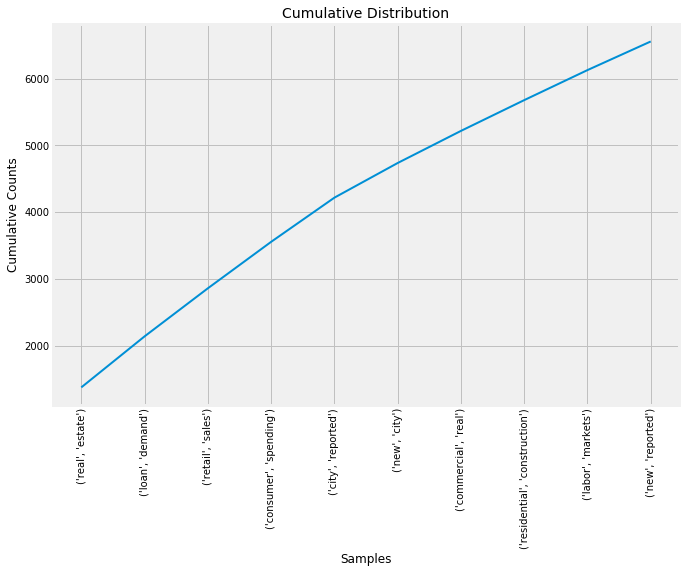

In [68]:
plt.figure(figsize=(10, 7))
plt.title('Cumulative Distribution', fontsize=14)
Fdist.plot(10, cumulative=True)

After applying filters, we now observe more meaningful expressions. For example,('sports', 'utility', 'vehicles') is an expression used frequently.  

We may similarly find collocations among spanning intervening words.

In [69]:
finder = BigramCollocationFinder.from_words(full_list)

finder.apply_freq_filter(3)
ignored_words = nltk.corpus.stopwords.words('english')

finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('real', 'estate'),
 ('consumer', 'spending'),
 ('loan', 'demand'),
 ('year', 'ago'),
 ('retail', 'sales'),
 ('labor', 'markets'),
 ('wage', 'pressures'),
 ('commercial', 'real'),
 ('since', 'last'),
 ('natural', 'gas')]

In [286]:
# print('%0.4f' % bigram_measures.student_t(8, (15828, 4675), 14307668))

# print('%0.4f' % bigram_measures.student_t(20, (42, 20), 14307668))

In [287]:
# with open('full_list.txt', 'w') as f:
#     for item in full_list:
#         f.write("%s\n" % item)

In [288]:
# text = open('full_list.txt', 'r')

## Searching the Document

In [290]:
type(full_list)

list

In [74]:
# converts the list into NLTK text
full_text = nltk.Text(full_list)

In [75]:
type(full_text)

nltk.text.Text

*A concordance permits us to see words in context.*

In [76]:
full_text.concordance('wages')

Displaying 25 of 536 matches:
 future rainfall flooding employment wages employment continued increase nation
ssures reported moderate wage growth wages skilled unskilled positions generall
e range tariffs freight costs rising wages often cited key factors driving tren
firms expanded employment moderately wages climbed moderately wide range indust
modestly labor market remained tight wages increased balance nonlabor input cos
manufacturing little changed balance wages prices rose modestly financial condi
 weak energy mixed across employment wages employment increased modest moderate
easingly choosing enter labor market wages continued increase low high skilled 
 majority reported moderately higher wages addition half noted rising non wage 
mployment increased modestly sectors wages grew moderately across board selling
expanded labor market remained tight wages increased average nonlabor input cos
nged consumer spending fell modestly wages rose modestly prices rose slightly f
ade politi

In [77]:
full_text.concordance('market', width=80, lines=10)

Displaying 10 of 692 matches:
attract retain employees tight labor market led continued wage pressures reporte
y constrained expansions tight labor market constrained hiring spurred wage incr
ditions economic grew modestly labor market remained tight wages increased balan
continued expand moderate pace labor market conditions remained tight price infl
ts increasingly choosing enter labor market wages continued increase low high sk
n economic moderately expanded labor market remained tight wages increased avera
continued expand moderate pace labor market conditions remained tight price infl
imistic response increased financial market volatility rising short term interes
conomic improved moderate pace labor market remained tight wages creased average
continued expand moderate pace labor market conditions remained tight price infl


In [78]:
# words similar to 'wages' in each document
full_text.similar('wages')

reported prices city new sales manufacturing retail noted however
although firms increased mixed home demand manufacturers indicated
several overall reports


In [79]:
full_text.common_contexts(['wages', 'market'])

tight_skilled reported_temporary


In [80]:
full_text.common_contexts(['economy', 'employment'])

modestly_continued said_expanded reported_continued overall_gains


In [81]:
full_text.common_contexts(['wages', 'firms'])

said_increased city_reported retail_reported employment_reported
reporting_said increases_generally areas_prices manufacturing_city
reported_continued manufacturing_continued manufacturing_increased
prices_prices several_reported although_reported employment_several
reported_retail


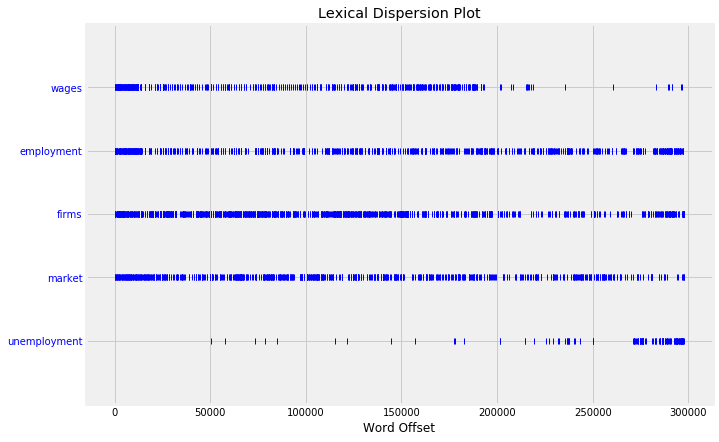

In [83]:
plt.figure(figsize=(10, 7))
full_text.dispersion_plot(["wages", "employment", "firms", "market", "unemployment"])

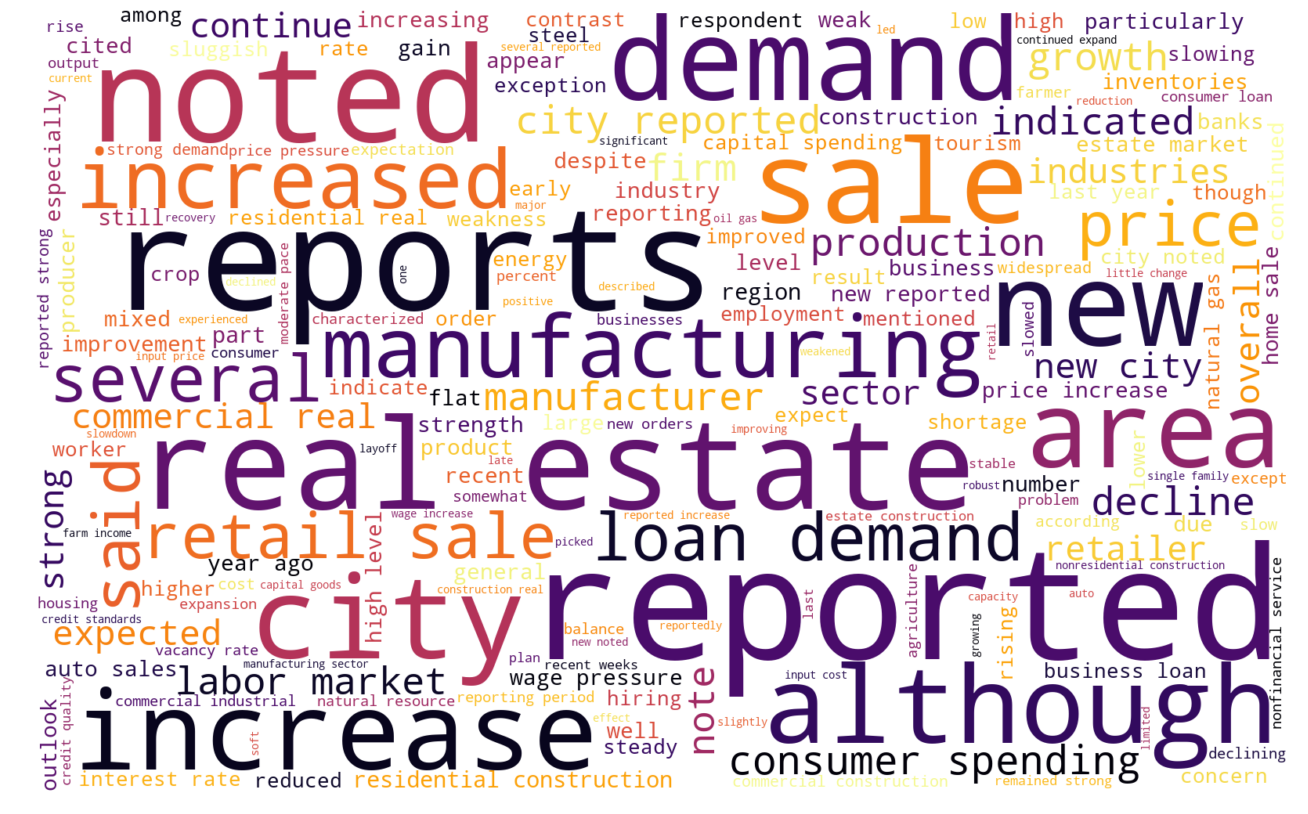

In [84]:
# returns a word cloud of cleaned text 
clean_string = []
# iterates over values assigned to notify_nyc
for i in national['clean_text']:
    clean_string.append(i)
clean_string = pd.Series(clean_string).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(clean_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

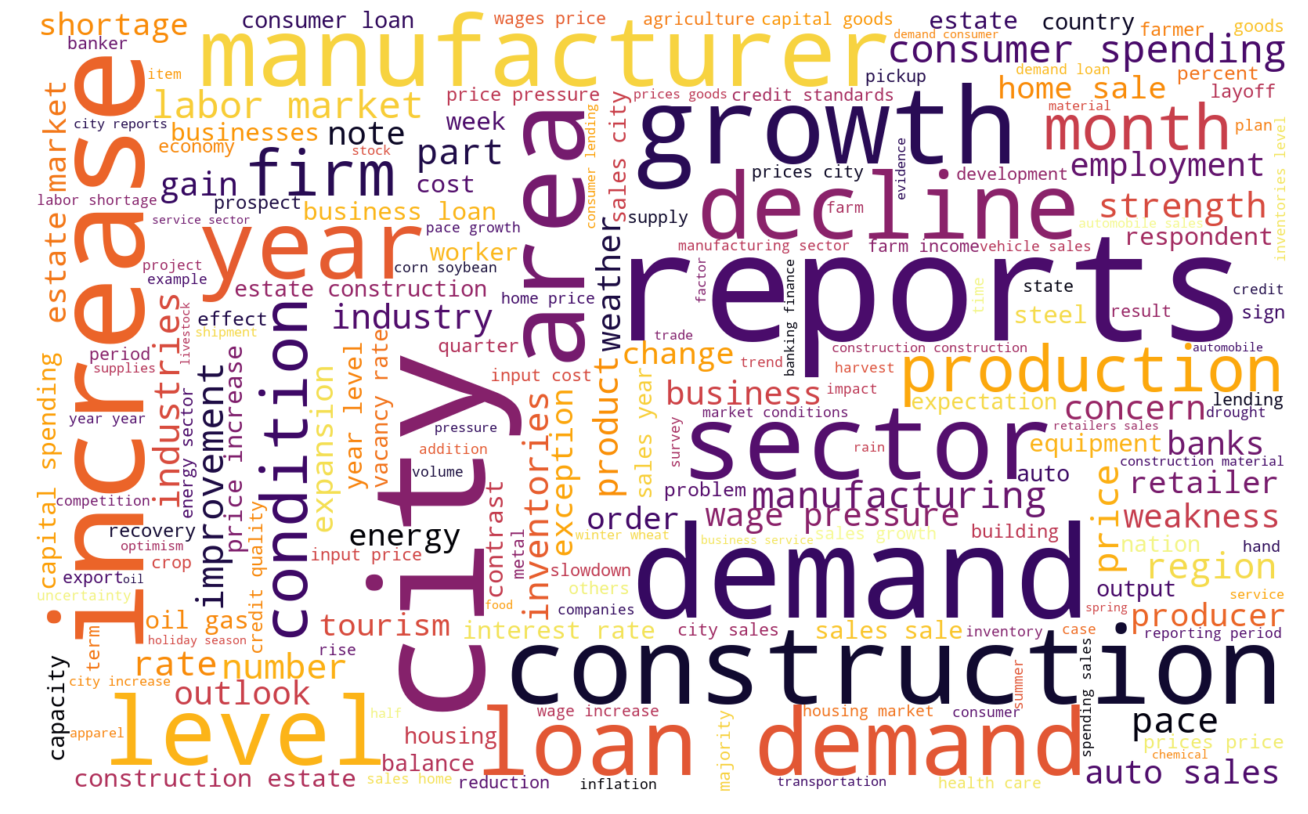

In [87]:
# returns a word cloud of proper nouns 
clean_string = []
# iterates over values assigned to notify_nyc
for i in national['proper_nouns']:
    clean_string.append(i)
clean_string = pd.Series(clean_string).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(clean_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()